In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('/Users/tatanagnedina/Downloads/salary_data.csv', low_memory=False)

In [5]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [8]:
data['YearsExperience'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

In [10]:
model = smf.ols(formula="Salary ~ YearsExperience", data=data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           1.14e-20
Time:                        23:24:28   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     

In [11]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [12]:
center_subset = data.copy()
center_subset['YearsExperience' + '_c'] = data['YearsExperience'] - data['YearsExperience'].mean()
print(center_subset['YearsExperience' + '_c'].describe())

count    3.000000e+01
mean     5.921189e-17
std      2.837888e+00
min     -4.213333e+00
25%     -2.113333e+00
50%     -6.133333e-01
75%      2.386667e+00
max      5.186667e+00
Name: YearsExperience_c, dtype: float64


In [13]:
model = smf.ols(formula="Salary ~ YearsExperience_c", data=center_subset).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 17 Mar 2021   Prob (F-statistic):           1.14e-20
Time:                        23:31:49   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            7.6e+04   1056.79

In [14]:
print(model.pvalues)

Intercept            2.579093e-33
YearsExperience_c    1.143068e-20
dtype: float64


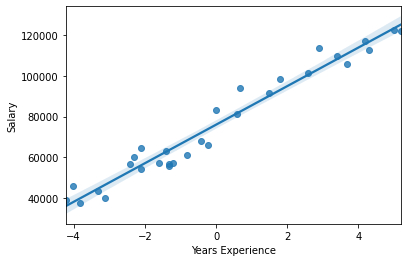

In [15]:
scat1 = seaborn.regplot(x="YearsExperience_c", y="Salary", scatter=True, data=center_subset)
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()